In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
# load dataset

train=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
test=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")
ss=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv")

## Find more information about the training dataset

In [4]:
train.shape

(40000, 12)

In [5]:
train.head()

,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


## Describing Numeric Values

In [7]:
train.describe(include=[np.number])

,id,duration,days_left,price
count,40000.00000,36987.000000,35562.000000,40000.00000
mean,19999.50000,12.004088,26.197936,20801.49025
std,11547.14972,7.108063,13.469232,22729.14842
min,0.00000,0.830000,1.000000,1105.00000
25%,9999.75000,6.670000,15.000000,4687.00000
50%,19999.50000,11.080000,26.000000,7353.00000
75%,29999.25000,15.920000,38.000000,42521.00000
max,39999.00000,47.080000,49.000000,114704.00000


In [8]:
test.describe(include=[np.number])

,id,duration,days_left
count,10000.00000,9418.000000,9304.000000
mean,4999.50000,12.005125,26.163156
std,2886.89568,7.086652,13.453717
min,0.00000,0.920000,1.000000
25%,2499.75000,6.670000,15.000000
50%,4999.50000,11.170000,26.000000
75%,7499.25000,15.920000,38.000000
max,9999.00000,40.420000,49.000000


## Identifying & Handling missing values

In [9]:
train.isna().sum()

id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64

In [10]:
train['duration'] = train['duration'].fillna(train['duration'].median())
train['days_left'] = train['days_left'].fillna(train['days_left'].median())
train['stops'] = train['stops'].fillna(train['stops'].mode()[0])
train['airline'] = train['airline'].fillna('Uknown_Airline')

def _fill_group_mode(series, global_mode):
    mode = series.mode()
    return series.fillna(mode.iloc[0] if not mode.empty else global_mode)

global_dep_mode = train['departure'].mode()[0]

train['departure'] = (train
    .groupby(['airline', 'source'])['departure']
    .transform(_fill_group_mode, global_mode=global_dep_mode))

In [11]:
test.isna().sum()

id               0
airline        548
flight           0
source           0
departure      920
stops          651
arrival          0
destination      0
class            0
duration       582
days_left      696
dtype: int64

In [12]:
test['duration'] = test['duration'].fillna(test['duration'].median())
test['days_left'] = test['days_left'].fillna(test['days_left'].median())
test['airline'] = test['airline'].fillna('Uknown_Airline')
test['stops'] = test['stops'].fillna(test['stops'].mode()[0])

def _fill_group_mode(series, global_mode):
    mode = series.mode()
    return series.fillna(mode.iloc[0] if not mode.empty else global_mode)

global_dep_mode = test['departure'].mode()[0]

test['departure'] = (test
    .groupby(['airline', 'source'])['departure']
    .transform(_fill_group_mode, global_mode=global_dep_mode))

In [13]:
print(f"Number of missing values in train: {train.isna().sum().sum()} and number of missing values in test: {test.isna().sum().sum()}")

Number of missing values in train: 0 and number of missing values in test: 0


## Identifying and Handling duplicate values

In [14]:
train.duplicated().sum()

0

Since there are no duplicates we won't perform any actions

## Finding outliers

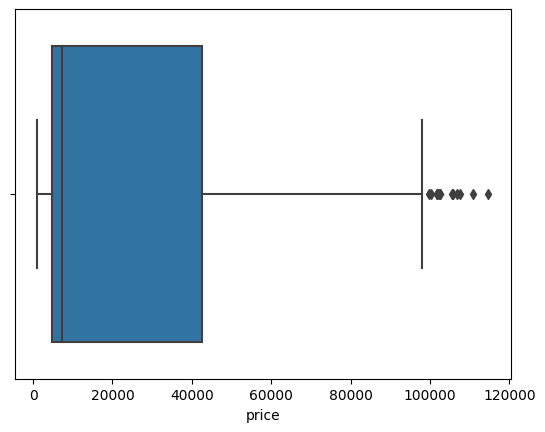

In [15]:
sns.boxplot(x=train['price'])
plt.show()

# Data visualization

I've choosen three diff types

1. Scatter Plot
2. ECDF
3. Heat-Map


In [16]:
vis_df = train.copy()

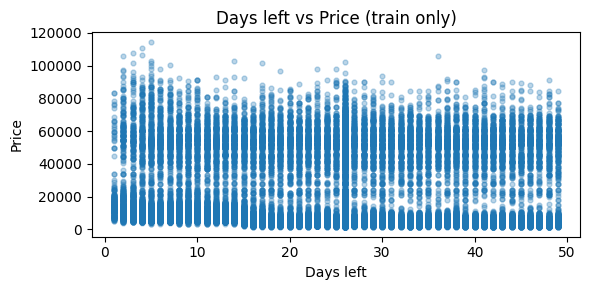

In [17]:
# Scatter plot

plt.figure(figsize=(6,3))
plt.scatter(vis_df['days_left'], vis_df['price'],
            s=12, alpha=0.3, marker='o')
plt.xlabel('Days left')
plt.ylabel('Price')
plt.title('Days left vs Price (train only)')
plt.tight_layout()
plt.show()

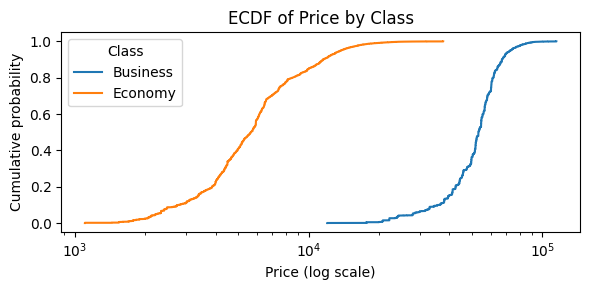

In [18]:
# ECDF
plt.figure(figsize=(6, 3))
for cls in vis_df['class'].unique():
    prices = np.sort(vis_df.loc[vis_df['class'] == cls, 'price'].dropna().values)
    yvals  = np.arange(1, len(prices) + 1) / float(len(prices))
    plt.step(prices, yvals, where='post', label=str(cls))
plt.xscale('log')
plt.xlabel('Price (log scale)')
plt.ylabel('Cumulative probability')
plt.title('ECDF of Price by Class')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


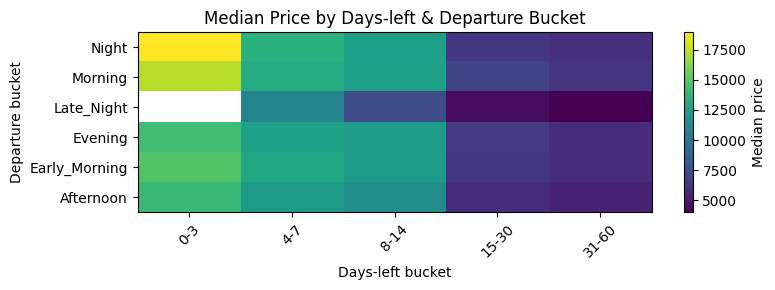

In [19]:
bins   = [0, 3, 7, 14, 30, 60, 90, 365]
labels = ['0-3', '4-7', '8-14', '15-30', '31-60', '61-90', '90+']
vis_df['days_bin'] = pd.cut(vis_df['days_left'], bins=bins,
                        labels=labels, include_lowest=True)

pivot = (vis_df.dropna(subset=['departure', 'days_bin', 'price'])
           .pivot_table(index='departure',
                        columns='days_bin',
                        values='price',
                        aggfunc='median'))

plt.figure(figsize=(8, 3))
plt.imshow(pivot, aspect='auto', origin='lower')
plt.colorbar(label='Median price')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)),   pivot.index)
plt.xlabel('Days-left bucket')
plt.ylabel('Departure bucket')
plt.title('Median Price by Days-left & Departure Bucket')
plt.tight_layout()
plt.show()

# Scaling and Encoding

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      40000 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    40000 non-null  object 
 5   stops        40000 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     40000 non-null  float64
 10  days_left    40000 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [21]:
train.head()

,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,11.08,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,Uknown_Airline,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [22]:
cat_cols = ['airline','flight','source','departure',
            'arrival','destination','class']      # keep stops separate
train[cat_cols] = train[cat_cols].astype('category')


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           40000 non-null  int64   
 1   airline      40000 non-null  category
 2   flight       40000 non-null  category
 3   source       40000 non-null  category
 4   departure    40000 non-null  category
 5   stops        40000 non-null  object  
 6   arrival      40000 non-null  category
 7   destination  40000 non-null  category
 8   class        40000 non-null  category
 9   duration     40000 non-null  float64 
 10  days_left    40000 non-null  float64 
 11  price        40000 non-null  int64   
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 1.9+ MB


In [24]:
from sklearn.model_selection import train_test_split

X_full = train.drop(columns=['price', 'id'])
y_full = train['price']

X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

X_test = test.drop(columns=['id']) 

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

low_cat  = ['airline', 'departure', 'class']
high_cat = ['source', 'destination', 'arrival', 'flight', 'stops']
num_cols = ['duration', 'days_left']

pre_proc = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), low_cat),
    ('te', TargetEncoder(), high_cat),
    ('ss', StandardScaler(), num_cols)
])


pre_proc.fit(X_train, y_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['airline', 'departure', 'class']),
                                ('te', TargetEncoder(),
                                 ['source', 'destination', 'arrival', 'flight',
                                  'stops']),
                                ('ss', StandardScaler(),
                                 ['duration', 'days_left'])])

# Models

1. Elastic Net
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. LightGBM Regressor
5. CatBoost Regressor
6. Support-Vector Regressor (SVR)
7. Stacking Regressor

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    "elastic_net": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0, max_iter=2000),
    "random_forest": RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1),
    "gbrt": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=0),
    "lightgbm": LGBMRegressor(n_estimators=600, learning_rate=0.05, random_state=0, verbosity=-1),
    "catboost": CatBoostRegressor(iterations=800, depth=6, learning_rate=0.05,loss_function='RMSE', verbose=False, random_seed=0),
    "svr": SVR(C=10, epsilon=0.2, kernel='rbf')
}

pipelines = {
    name: Pipeline([('prep', pre_proc), ('est', mdl)])
    for name, mdl in models.items()
}

stack = StackingRegressor(
    estimators=[
        ('rf',  models["random_forest"]),
        ('gbrt', models["gbrt"]),
        ('enet', models["elastic_net"])
    ],
    final_estimator=GradientBoostingRegressor(random_state=0)
)
pipelines["stacking"] = Pipeline([('prep', pre_proc), ('est', stack)])

scores = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    scores[name] = {
        "MAE": mean_absolute_error(y_val, preds),
        "R²":  r2_score(y_val, preds)
    }

print("\n Validation performance")
for name, m in scores.items():
    print(f"{name:12s}  MAE: {m['MAE']:.2f}   R²: {m['R²']:.3f}")


 Validation performance
elastic_net   MAE: 5170.49   R²: 0.896
random_forest  MAE: 1711.41   R²: 0.978
gbrt          MAE: 2534.75   R²: 0.965
lightgbm      MAE: 1996.22   R²: 0.977
catboost      MAE: 2169.18   R²: 0.973
svr           MAE: 15127.19   R²: -0.112
stacking      MAE: 1726.55   R²: 0.978


# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

mae = make_scorer(mean_absolute_error, greater_is_better=False)
cv  = KFold(n_splits=3, shuffle=True, random_state=42)   # 3-fold

search_space = {
    "lightgbm": (
        Pipeline([('prep', pre_proc),
                  ('est',  LGBMRegressor(random_state=0,force_row_wise=True, n_jobs=1, verbosity=-1))]),
        {                       # narrow ranges
            "est__n_estimators":  np.arange(400, 900, 200),
            "est__learning_rate": [0.05, 0.1],
            "est__num_leaves":    [31, 63, 127]
        }
    ),
    "random_forest": (
        Pipeline([('prep', pre_proc),
                  ('est',  RandomForestRegressor(random_state=0,
                                                 n_jobs=1))]),
        {
            "est__n_estimators": [300, 600],
            "est__max_depth":    [None, 20]
        }
    ),
    "elastic_net": (
        Pipeline([('prep', pre_proc),
                  ('est',  ElasticNet(random_state=0, max_iter=5000))]),
        {
            "est__alpha":    [0.01, 0.1, 1.0],
            "est__l1_ratio": [0.2, 0.5, 0.8]
        }
    )
}

best_pipes = {}
for name, (pipe, dist) in search_space.items():
    print(f"🔍  {name}")
    rs = RandomizedSearchCV(
        pipe, dist,
        n_iter=10,
        scoring=mae,
        cv=cv,
        random_state=0,
        verbose=0
    )
    rs.fit(X_train, y_train)
    print(f"   best MAE: {-rs.best_score_:.2f}")
    best_pipes[name] = rs.best_estimator_


🔍  lightgbm
   best MAE: 1938.64
🔍  random_forest
   best MAE: 1852.32
🔍  elastic_net
   best MAE: 4614.94


In [28]:
# refitting the best model

best_pipe = best_pipes['random_forest']
best_pipe.fit(X_full, y_full)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'departure',
                                                   'class']),
                                                 ('te', TargetEncoder(),
                                                  ['source', 'destination',
                                                   'arrival', 'flight',
                                                   'stops']),
                                                 ('ss', StandardScaler(),
                                                  ['duration', 'days_left'])])),
                ('est',
                 RandomForestRegressor(n_estimators=600, n_jobs=1,
                                       random_state=0))])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'elastic_net'),
  Text(1, 0, 'random_forest'),
  Text(2, 0, 'gbrt'),
  Text(3, 0, 'lightgbm'),
  Text(4, 0, 'catboost'),
  Text(5, 0, 'svr'),
  Text(6, 0, 'stacking')])

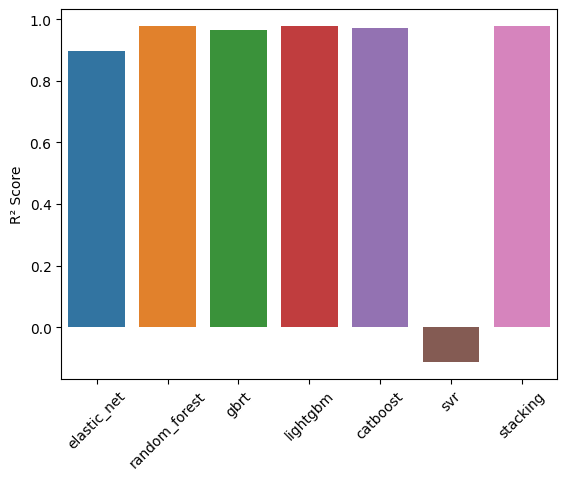

In [29]:
results = {
    'elastic_net': 0.896,
    'random_forest': 0.978,
    'gbrt': 0.965,
    'lightgbm' : 0.977,
    'catboost': 0.973,
    'svr': -0.112,
    'stacking': 0.978
}

sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("R² Score")
plt.xticks(rotation=45)

In [30]:
preds = best_pipe.predict(X_test)

submission = pd.DataFrame({'id': test['id'], 'price': preds})
submission.to_csv('submission.csv', index=False)